In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
import optuna.visualization as vis
import matplotlib.pyplot as plt
import shap
import lightgbm
import xgboost as xgb
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
import optuna.visualization as vis
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")
import optuna
from joblib import dump
from joblib import load
import joblib



In [4]:
# モデルを読み込む
XGBoost = xgb.Booster()
XGBoost.load_model('../models/XGBoost')

# データの読み込み
train_data = pd.read_csv('../data_processed/train_data_processed.csv')
X = train_data.drop(['attendance'], axis=1)


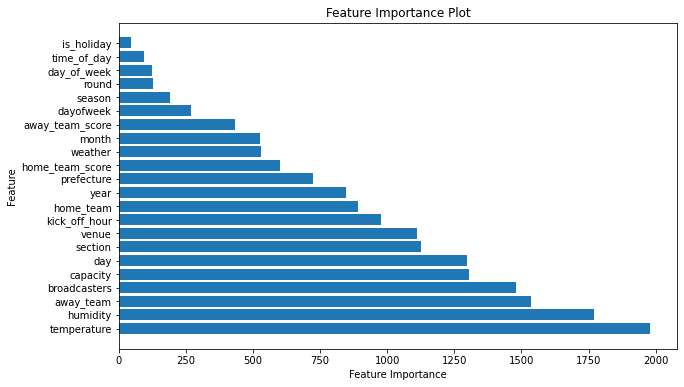

In [5]:
# 特徴量の重要度を取得
feature_importance = XGBoost.get_score(importance_type='weight')

# 特徴量の名前と重要度を取得
feature_names = list(X.columns)
importance_values = list(feature_importance.values())

# 重要度の降順で特徴量を表示
sorted_indices = np.argsort(importance_values)[::-1]
sorted_feature_importance = [importance_values[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# バーンプロットを作成
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

 98%|===================| 3315/3366 [01:01<00:00]        

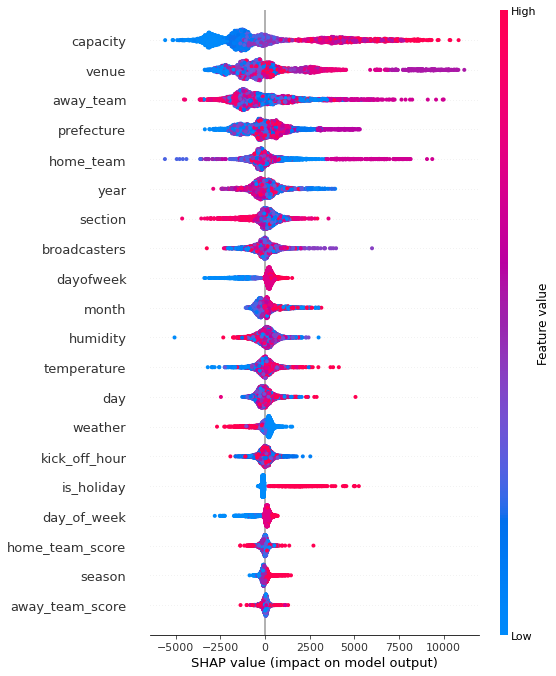

In [6]:
# SHAP値を計算
explainer = shap.Explainer(XGBoost, X)  # Xにはモデルに入力するデータを指定します

# 特定のインスタンスのSHAP値を表示
instance_index = 0  # 解析したいインスタンスのインデックスを指定
shap_values = explainer.shap_values(X.iloc[instance_index])
shap.force_plot(explainer.expected_value, shap_values, X.iloc[instance_index])

# 全体のSHAP値を表示
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)